In [1]:
import pandas as pd

data = pd.read_csv("extracted_featurePoly.csv")
data.head()

,Unnamed: 0,ID,Timestamp,X,Y,Button,Duration,User_ID,Delta_X,Delta_Y,...,Acceleration,Angle,Jerk,Curvature,Direction_Change,Is_Stop,Stop_Duration,Dominant_Frequency,Power_Low_Frequencies,Power_High_Frequencies
0,68695,004-poly-315,1.678910e+09,1509.0,662.0,-1.0,-1.0,4.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,1.0,-1.0,NaN,NaN,NaN
1,68696,004-poly-315,1.678910e+09,1488.0,646.0,-1.0,-1.0,4.0,-21.0,-16.0,...,26.400758,-2.490516,26.400758,-0.094335,1.0,0.0,-0.0,NaN,NaN,NaN
2,68697,004-poly-315,1.678910e+09,1466.0,630.0,-1.0,-1.0,4.0,-22.0,-16.0,...,0.802183,-2.512796,-25.598574,-0.000819,1.0,0.0,-0.0,NaN,NaN,NaN
3,68698,004-poly-315,1.678910e+09,1438.0,612.0,-1.0,-1.0,4.0,-28.0,-18.0,...,6.083693,-2.570255,5.281509,-0.001726,1.0,0.0,-0.0,NaN,NaN,NaN
4,68699,004-poly-315,1.678910e+09,1408.0,590.0,-1.0,-1.0,4.0,-30.0,-22.0,...,3.915517,-2.508844,-2.168176,0.001651,1.0,0.0,-0.0,NaN,NaN,NaN


In [2]:
# List of columns to select
selected_columns = ['Y', 'Stop_Duration', 'X', 'Jerk', 'Direction_Change', 'Movement_Distance', 'Acceleration', 'Button', 'Angle', 'ID']

# Select the desired columns
df_selected = data[selected_columns]
df_selected.head()

,Y,Stop_Duration,X,Jerk,Direction_Change,Movement_Distance,Acceleration,Button,Angle,ID
0,662.0,-1.0,1509.0,0.000000,0.0,0.000000,0.000000,-1.0,0.000000,004-poly-315
1,646.0,-0.0,1488.0,26.400758,1.0,26.400758,26.400758,-1.0,-2.490516,004-poly-315
2,630.0,-0.0,1466.0,-25.598574,1.0,27.202941,0.802183,-1.0,-2.512796,004-poly-315
3,612.0,-0.0,1438.0,5.281509,1.0,33.286634,6.083693,-1.0,-2.570255,004-poly-315
4,590.0,-0.0,1408.0,-2.168176,1.0,37.202150,3.915517,-1.0,-2.508844,004-poly-315


In [3]:
df_selected.dropna(inplace=True)
df_selected

C:\Users\drago\AppData\Local\Temp\ipykernel_17296\3290963421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.dropna(inplace=True)


,Y,Stop_Duration,X,Jerk,Direction_Change,Movement_Distance,Acceleration,Button,Angle,ID
0,662.0,-1.0,1509.0,0.000000,0.0,0.000000,0.000000,-1.0,0.000000,004-poly-315
1,646.0,-0.0,1488.0,26.400758,1.0,26.400758,26.400758,-1.0,-2.490516,004-poly-315
2,630.0,-0.0,1466.0,-25.598574,1.0,27.202941,0.802183,-1.0,-2.512796,004-poly-315
3,612.0,-0.0,1438.0,5.281509,1.0,33.286634,6.083693,-1.0,-2.570255,004-poly-315
4,590.0,-0.0,1408.0,-2.168176,1.0,37.202150,3.915517,-1.0,-2.508844,004-poly-315
...,...,...,...,...,...,...,...,...,...,...
549121,541.0,-0.0,1465.0,-1.000000,0.0,2.000000,-1.000000,-1.0,3.141593,020-poly-403
549122,541.0,-0.0,1463.0,1.000000,0.0,2.000000,0.000000,-1.0,3.141593,020-poly-403
549123,541.0,-0.0,1462.0,-1.000000,0.0,1.000000,-1.000000,-1.0,3.141593,020-poly-403
549124,541.0,-0.0,1461.0,1.000000,0.0,1.000000,0.000000,-1.0,3.141593,020-poly-403


# Label encoder

In [4]:
from sklearn.preprocessing import LabelEncoder

df = df_selected

# Use LabelEncoder to convert User_ID into numerical labels
encoder = LabelEncoder()
df['User_ID'] = encoder.fit_transform(df['ID'])

# Print the mapping for reference
mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print("Label mapping:", mapping)

Label mapping: {'004-poly-315': 0, '005-poly-315': 1, '007-poly-317': 2, '008-poly-317': 3, '009-poly-320': 4, '010-poly-317': 5, '011-poly-326': 6, '012-poly-326': 7, '013-poly-326': 8, '014-poly-328': 9, '015-poly-328': 10, '018-poly-330': 11, '019-poly-403': 12, '020-poly-403': 13}


C:\Users\drago\AppData\Local\Temp\ipykernel_17296\2500150626.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['User_ID'] = encoder.fit_transform(df['ID'])


In [5]:
df.drop(columns='ID', inplace=True)

C:\Users\drago\AppData\Local\Temp\ipykernel_17296\1054706017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='ID', inplace=True)


In [6]:
df.head()

,Y,Stop_Duration,X,Jerk,Direction_Change,Movement_Distance,Acceleration,Button,Angle,User_ID
0,662.0,-1.0,1509.0,0.000000,0.0,0.000000,0.000000,-1.0,0.000000,0
1,646.0,-0.0,1488.0,26.400758,1.0,26.400758,26.400758,-1.0,-2.490516,0
2,630.0,-0.0,1466.0,-25.598574,1.0,27.202941,0.802183,-1.0,-2.512796,0
3,612.0,-0.0,1438.0,5.281509,1.0,33.286634,6.083693,-1.0,-2.570255,0
4,590.0,-0.0,1408.0,-2.168176,1.0,37.202150,3.915517,-1.0,-2.508844,0


In [7]:
df["User_ID"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

# Normalize

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the features
features = ['Y', 'Stop_Duration', 'X', 'Jerk', 'Direction_Change', 'Movement_Distance', 'Acceleration', 'Button', 'Angle']
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])


C:\Users\drago\AppData\Local\Temp\ipykernel_17296\334590246.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features] = scaler.fit_transform(df[features])


# divide data based on user

In [9]:

def relabeluser(data, user):
    df = data.copy()
    # Relabel the User_ID column
    df['User_ID'] = df['User_ID'].apply(lambda x: 0 if x == user else 1)
    return df


User 13

In [10]:
user13 = relabeluser(df,8)
# Check the distribution of the relabeled User_ID
user_distribution13 = user13['User_ID'].value_counts()

user_distribution13

1    503651
0     45475
Name: User_ID, dtype: int64

user 15

In [11]:
user15 = relabeluser(df,10)
# Check the distribution of the relabeled User_ID
user_distribution15 = user15['User_ID'].value_counts()

user_distribution15

1    511794
0     37332
Name: User_ID, dtype: int64

In [12]:
user20 = relabeluser(df,13)
# Check the distribution of the relabeled User_ID
user_distribution20 = user20['User_ID'].value_counts()

user_distribution20

1    512359
0     36767
Name: User_ID, dtype: int64

In [13]:
user8 = relabeluser(df,3)
# Check the distribution of the relabeled User_ID
user_distribution8 = user8['User_ID'].value_counts()

user_distribution8

1    507960
0     41166
Name: User_ID, dtype: int64

In [14]:
user4 = relabeluser(df,0)
# Check the distribution of the relabeled User_ID
user_distribution4 = user4['User_ID'].value_counts()

user_distribution4

1    505797
0     43329
Name: User_ID, dtype: int64

# Sequencing

In [15]:
import numpy as np

# Create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:(i+seq_length), :-1]
        y = data[i+seq_length][-1]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)


In [16]:
#user13
X13, y13 = create_sequences(user13.values, 40)
X15, y15 = create_sequences(user15.values, 40)
X20, y20 = create_sequences(user20.values, 40)
X8, y8 = create_sequences(user8.values, 40)
X4, y4 = create_sequences(user4.values, 40)

In [17]:
from sklearn.model_selection import train_test_split

#user13
# Split the dataset into training and testing sets
X_train13, X_test13, y_train13, y_test13 = train_test_split(X13, y13, test_size=0.2, random_state=42)


#user15
X_train15, X_test15, y_train15, y_test15 = train_test_split(X15, y15, test_size=0.2, random_state=42)
X_train20, X_test20, y_train20, y_test20 = train_test_split(X20, y20, test_size=0.2, random_state=42)
X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, y8, test_size=0.2, random_state=42)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Load all model LSTm and GRU

In [18]:
from keras.models import load_model

lstm_model13 = load_model('LSTM_poly_user13.h5')
gru_model13 = load_model('GRU_poly_USER13.h5')

lstm_model15 = load_model('LSTM_poly_user15.h5')
gru_model15 = load_model('GRU_poly_USER15.h5')

lstm_model20 = load_model('LSTM_poly_user20.h5')
gru_model20 = load_model('GRU_poly_USER20.h5')

lstm_model8 = load_model('LSTM_poly_user8.h5')
gru_model8 = load_model('GRU_poly_USER8.h5')

lstm_model4 = load_model('LSTM_poly_user4.h5')
gru_model4 = load_model('GRU_poly_USER4.h5')

# Test

# Uesr13

In [19]:
lstm_probs13 = lstm_model13.predict(X_test13)
gru_probs13 = gru_model13.predict(X_test13)


3432/3432 [==============================] - 42s 12ms/step


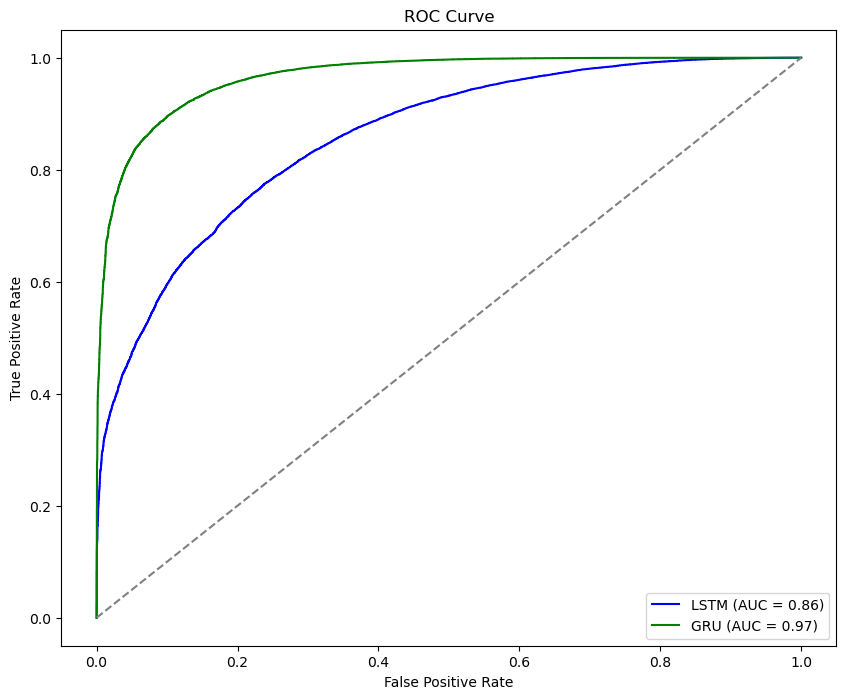

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr_lstm, tpr_lstm, _ = roc_curve(y_test13, lstm_probs13)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

fpr_gru, tpr_gru, _ = roc_curve(y_test13, gru_probs13)
roc_auc_gru = auc(fpr_gru, tpr_gru)

plt.figure(figsize=(10, 8))
plt.plot(fpr_lstm, tpr_lstm, color='blue', label=f'LSTM (AUC = {roc_auc_lstm:.2f})')
plt.plot(fpr_gru, tpr_gru, color='green', label=f'GRU (AUC = {roc_auc_gru:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


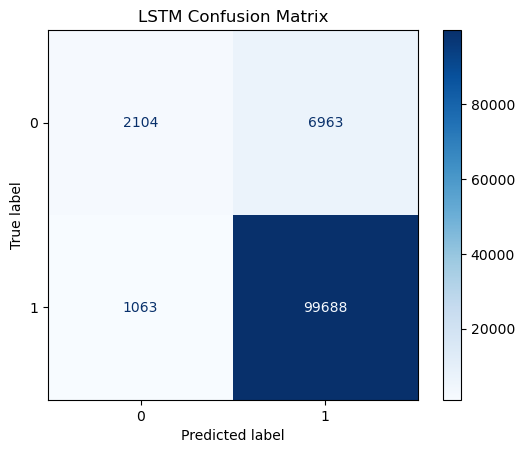

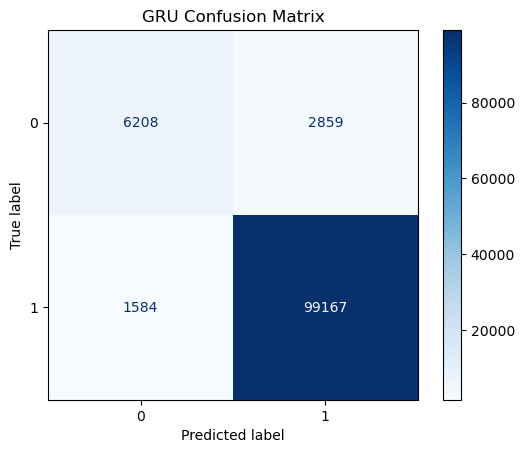

In [31]:
y_pred13gru = [1 if prob > 0.5 else 0 for prob in gru_probs13]

y_pred13lstm = [1 if prob > 0.5 else 0 for prob in lstm_probs13]

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(title)
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(y_test13, y_pred13lstm, title="LSTM Confusion Matrix")
plot_confusion_matrix(y_test13, y_pred13gru, title="GRU Confusion Matrix")


# User15

In [22]:
lstm_probs15 = lstm_model15.predict(X_test15)
gru_probs15 = gru_model15.predict(X_test15)


3432/3432 [==============================] - 38s 11ms/step


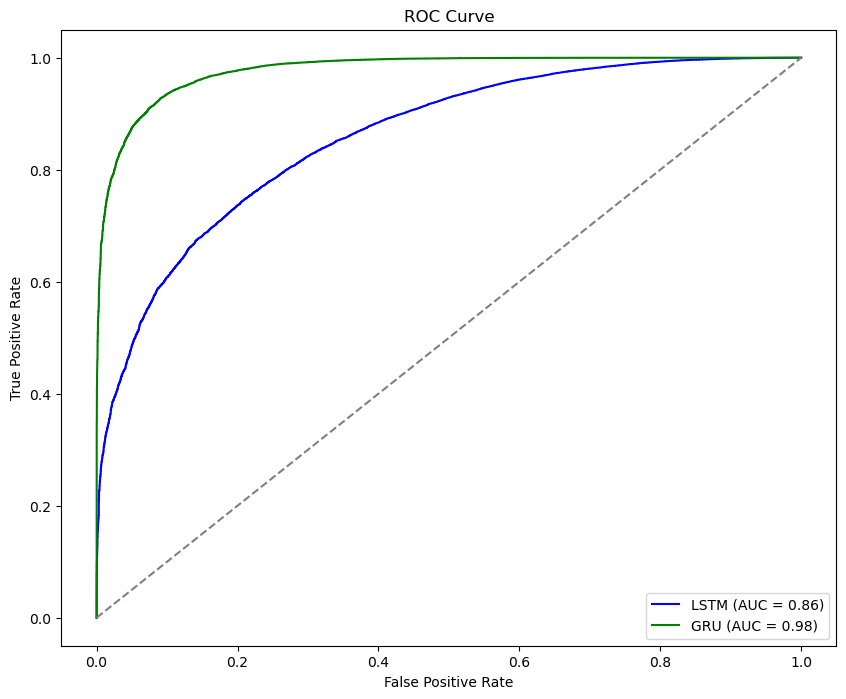

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr_lstm, tpr_lstm, _ = roc_curve(y_test15, lstm_probs15)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

fpr_gru, tpr_gru, _ = roc_curve(y_test15, gru_probs15)
roc_auc_gru = auc(fpr_gru, tpr_gru)

plt.figure(figsize=(10, 8))
plt.plot(fpr_lstm, tpr_lstm, color='blue', label=f'LSTM (AUC = {roc_auc_lstm:.2f})')
plt.plot(fpr_gru, tpr_gru, color='green', label=f'GRU (AUC = {roc_auc_gru:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


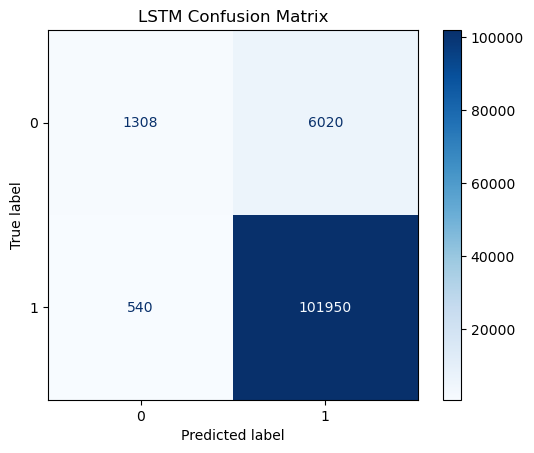

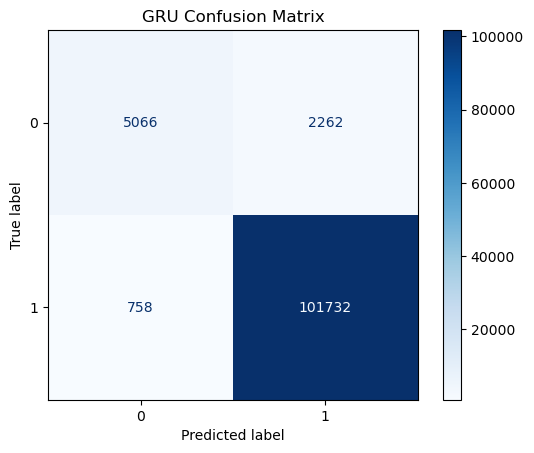

In [32]:
y_pred15gru = [1 if prob > 0.5 else 0 for prob in gru_probs15]

y_pred15lstm = [1 if prob > 0.5 else 0 for prob in lstm_probs15]

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(title)
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(y_test15, y_pred15lstm, title="LSTM Confusion Matrix")
plot_confusion_matrix(y_test15, y_pred15gru, title="GRU Confusion Matrix")


# User20

In [25]:
lstm_probs20 = lstm_model20.predict(X_test20)
gru_probs20 = gru_model20.predict(X_test20)


3432/3432 [==============================] - 41s 12ms/step


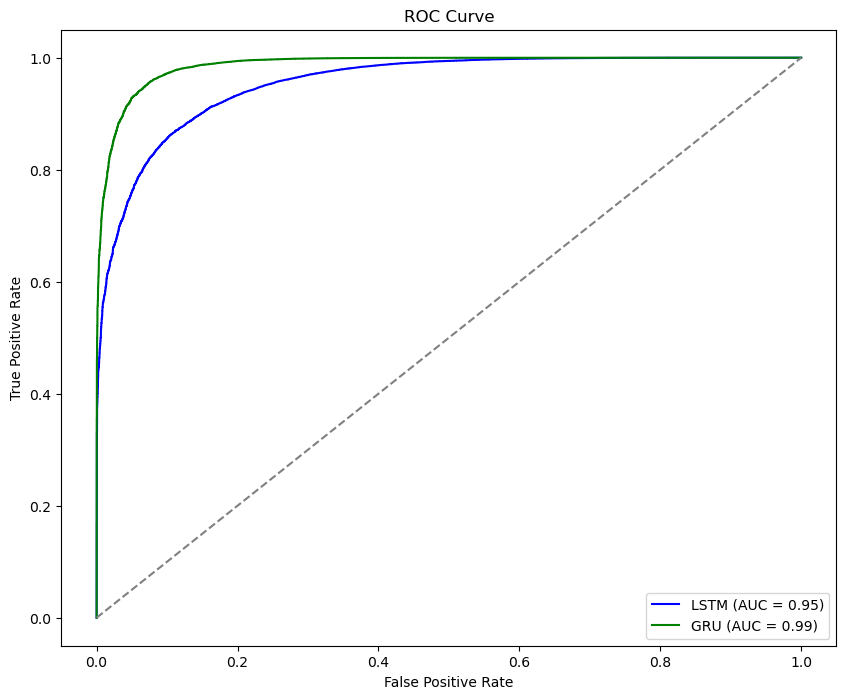

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr_lstm, tpr_lstm, _ = roc_curve(y_test20, lstm_probs20)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

fpr_gru, tpr_gru, _ = roc_curve(y_test20, gru_probs20)
roc_auc_gru = auc(fpr_gru, tpr_gru)

plt.figure(figsize=(10, 8))
plt.plot(fpr_lstm, tpr_lstm, color='blue', label=f'LSTM (AUC = {roc_auc_lstm:.2f})')
plt.plot(fpr_gru, tpr_gru, color='green', label=f'GRU (AUC = {roc_auc_gru:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


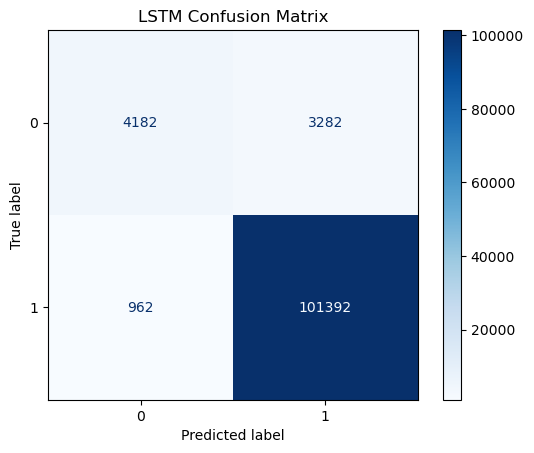

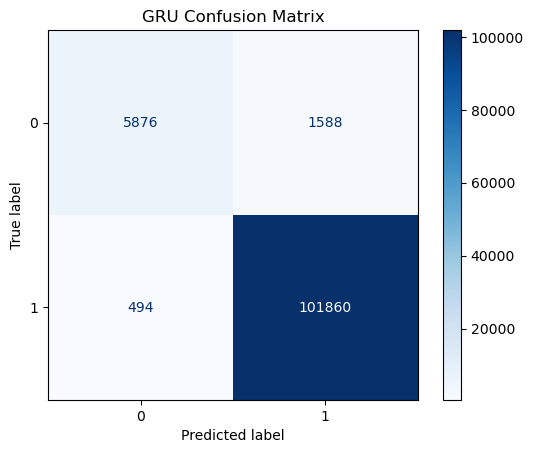

In [33]:
y_pred20gru = [1 if prob > 0.5 else 0 for prob in gru_probs20]

y_pred20lstm = [1 if prob > 0.5 else 0 for prob in lstm_probs20]

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(title)
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(y_test20, y_pred20lstm, title="LSTM Confusion Matrix")
plot_confusion_matrix(y_test20, y_pred20gru, title="GRU Confusion Matrix")


# user8

In [29]:
lstm_prob8 = lstm_model8.predict(X_test8)
gru_probs8 = gru_model8.predict(X_test8)


3432/3432 [==============================] - 41s 12ms/step


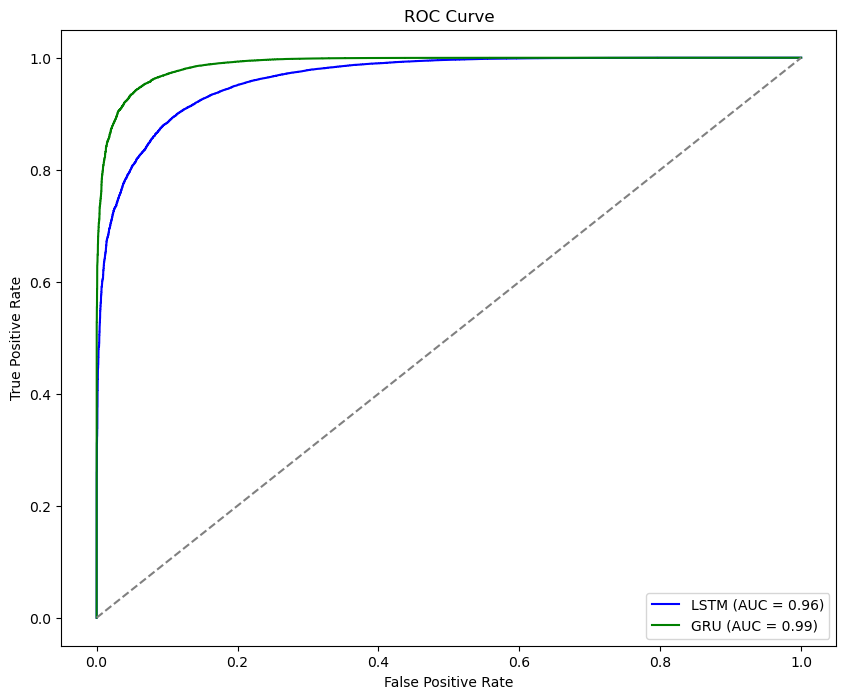

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr_lstm, tpr_lstm, _ = roc_curve(y_test8, lstm_prob8)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

fpr_gru, tpr_gru, _ = roc_curve(y_test8, gru_probs8)
roc_auc_gru = auc(fpr_gru, tpr_gru)

plt.figure(figsize=(10, 8))
plt.plot(fpr_lstm, tpr_lstm, color='blue', label=f'LSTM (AUC = {roc_auc_lstm:.2f})')
plt.plot(fpr_gru, tpr_gru, color='green', label=f'GRU (AUC = {roc_auc_gru:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


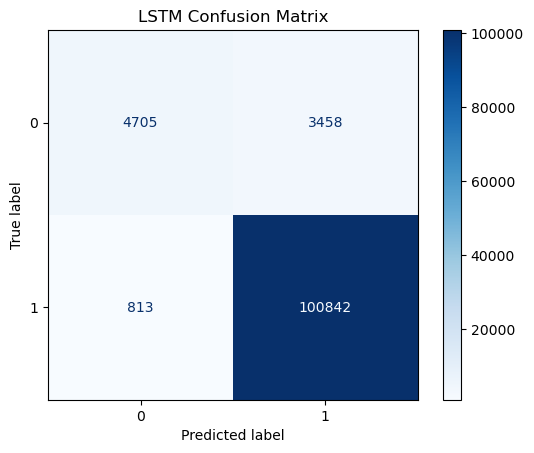

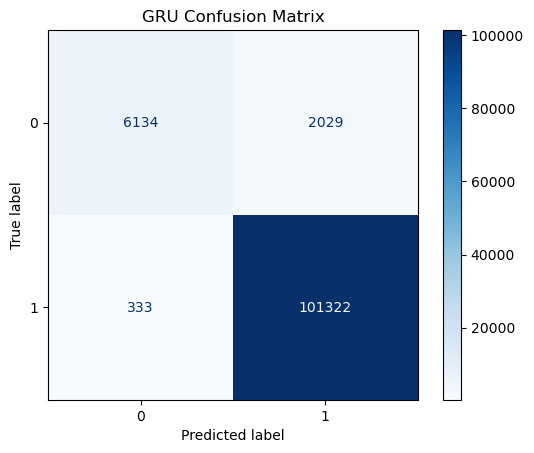

In [40]:
y_pred8gru = [1 if prob > 0.5 else 0 for prob in gru_probs8]

y_pred8lstm = [1 if prob > 0.5 else 0 for prob in lstm_prob8]

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(title)
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(y_test8, y_pred8lstm, title="LSTM Confusion Matrix")
plot_confusion_matrix(y_test8, y_pred8gru, title="GRU Confusion Matrix")
